<a href="https://colab.research.google.com/github/ARJUN78/Handwritten-digit-classification/blob/master/digitclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Classification**
**Arjun R**


**Roll No 10**

**S8 CS1**

In [1]:
#@title Mounting with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd

/content


In [0]:

import os
os.chdir('drive/My Drive')


In [0]:
# Importing the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack

# Needed for logistic regression
from sklearn.linear_model import LogisticRegression 

import random
import tensorflow as tf
from tensorflow import keras

##**Loding the data (MNIST)**

In [0]:
#@title Default title text
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [0]:
# Loading training images and training labels
train_img, train_lbl = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')

# Loading test images and test labels
test_img, test_lbl = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

##Normalizing data

In [0]:
train_img = train_img / 255.0

test_img = test_img / 255.0

In [20]:
# Shape of training image set
print(train_img.shape)

(60000, 784)


In [21]:
# Shape of training label set
print(train_lbl.shape)

(60000,)


In [22]:
# Shape of test image set
print(test_img.shape)

(10000, 784)


In [23]:
# Shape of test label set
print(test_lbl.shape)

(10000,)


##Data set sample

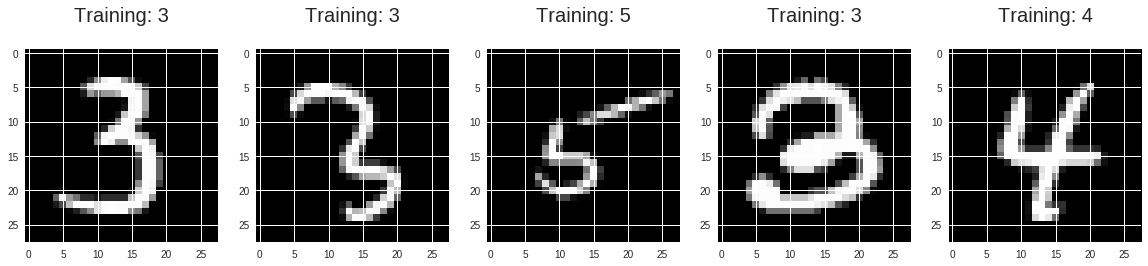

In [24]:
start_range = random.randint(0,59995)
end_range = start_range+5
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[start_range:end_range], train_lbl[start_range:end_range])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [25]:
k = random.randint(0,60000)
print("The array of pixel values(size 784) for a sample with label ",train_lbl[k])
print()
print(train_img[k])
print()
print("Length of the array is ",train_img[k].shape[0])

The array of pixel values(size 784) for a sample with label  9

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

##Defining the network architecture

In [0]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(784,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Fitting the model

In [28]:
model.fit(train_img, train_lbl, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2443 - acc: 0.9269
Epoch 2/7
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1040 - acc: 0.9684
Epoch 3/7
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0726 - acc: 0.9777
Epoch 4/7
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0556 - acc: 0.9825
Epoch 5/7
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0442 - acc: 0.9853
Epoch 6/7
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0333 - acc: 0.9886
Epoch 7/7
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0293 - acc: 0.9904


In [0]:
correct_indeces = []
wrong_indeces = []
predictions = []
prediction = model.predict_classes(test_img)
for i in range(10000):
    pred = prediction[i] 
    if test_lbl[i] == pred: 
        correct_indeces.append(i)
        predictions.append(pred)
    else:
        wrong_indeces.append(i)
        predictions.append(pred)


##Correct  predictions

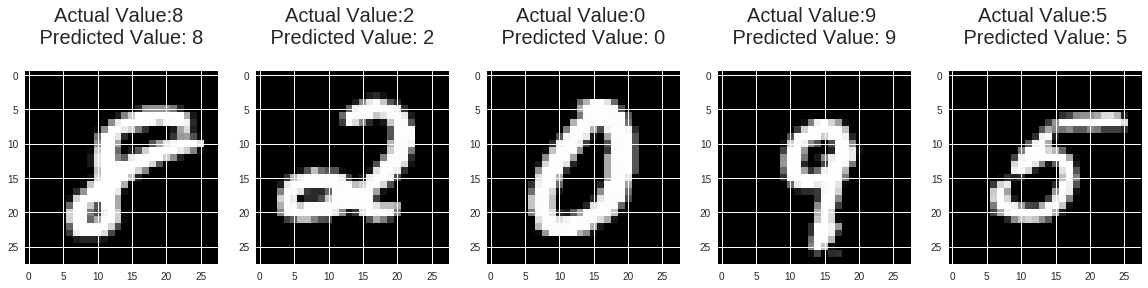

In [32]:
start_range = random.randint(0,len(correct_indeces)-5)
end_range = start_range+5
plt.figure(figsize=(20,4))
i = 0
for index in range(start_range, end_range):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(test_img[correct_indeces[index]], (28,28)), cmap=plt.cm.gray)
    plt.title('Actual Value:%i \n Predicted Value: %i \n' % (test_lbl[correct_indeces[index]], 
                                                             predictions[correct_indeces[index]]), fontsize = 20)
    i+=1

##Wrong predictions

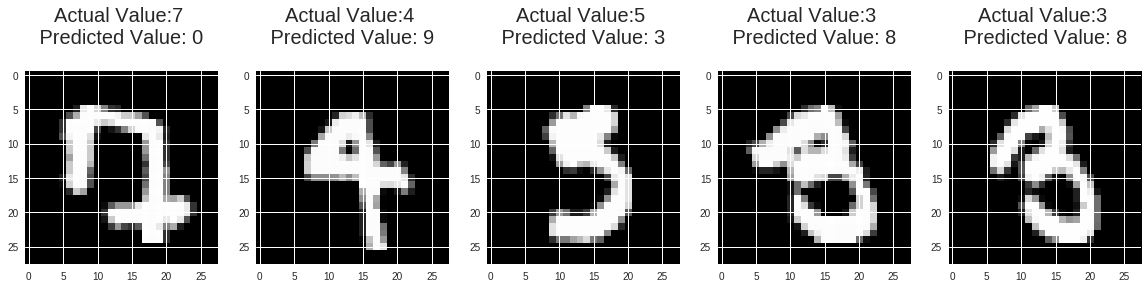

In [33]:
start_range = random.randint(0,len(wrong_indeces)-5)
end_range = start_range+5
plt.figure(figsize=(20,4))
#for index, (image, label) in enumerate(zip(test_img[start_range:end_range], test_lbl[start_range:end_range])):
#    plt.subplot(1, 5, index + 1)
#    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
#    plt.title('Actual Value: %i\n Predicted Value: %i \n' % (label, predictions[index]), fontsize = 20)
i = 0
for index in range(start_range, end_range):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(test_img[wrong_indeces[index]], (28,28)), cmap=plt.cm.gray)
    plt.title('Actual Value:%i \n Predicted Value: %i \n' % (test_lbl[wrong_indeces[index]], 
                                                             predictions[wrong_indeces[index]]), fontsize = 20)
    i+=1

##Accuracy

In [34]:
loss, accuracy = model.evaluate(test_img,test_lbl)
print("Accuracy = ",accuracy)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0877 - acc: 0.9752
Accuracy =  0.9752
